In [99]:
import pandas as pd
import texthero as th
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier

In [100]:
# Read Dataset
filename = '/home/sokhorn/sokhorn/Rupp/data_mining/DataSet/newsCorpora_with_header.csv'
df = pd.read_csv(filename, encoding="utf8", sep='\t', quotechar=" ", engine='python', usecols=["TITLE", "CATEGORY"], nrows=1000)

In [101]:
df.TITLE = th.clean(df.TITLE)

In [102]:
tfidf = TfidfVectorizer(stop_words='english')
lb_encoder = LabelEncoder()

In [103]:
X = tfidf.fit_transform(df.TITLE)
y = lb_encoder.fit_transform(df.CATEGORY)

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

In [105]:
decision_tree = DecisionTreeClassifier()
multiionnomail_nb = MultinomialNB()
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=(20, 10), random_state=1)

In [106]:
decision_tree.fit(X_train, y_train)
multiionnomail_nb.fit(X_train, y_train)
clf.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(20, 10), random_state=1,
              solver='lbfgs')

In [107]:
y_decision_tree=  decision_tree.predict(X_test)

In [108]:
y_multiionnomail_nb = multiionnomail_nb.predict(X_test)

In [109]:
anp = clf.predict(X_test)

In [110]:
title = ["China's CSI 300 Plunges to Five-Year Low on Export Slump"]
class_type = ["b"]

In [111]:
x = tfidf.transform(title)

In [112]:
decision_tree.predict(x)

array([0])

In [113]:
multiionnomail_nb.predict(x)

array([0])

In [114]:
accuracy_score(y_true=y_test, y_pred=y_decision_tree)

1.0

In [115]:
accuracy_score(y_true=y_test, y_pred=y_multiionnomail_nb)

0.975

In [116]:
accuracy_score(y_true=y_test, y_pred=anp)

1.0

<AxesSubplot:>

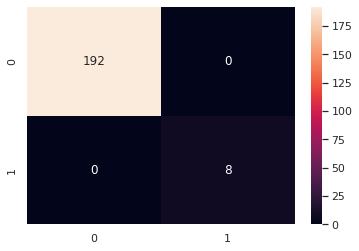

In [117]:
cf_decision_tree =  confusion_matrix(y_true=y_test, y_pred=y_decision_tree)
sns.heatmap(cf_decision_tree, annot=True,fmt='g')

<AxesSubplot:>

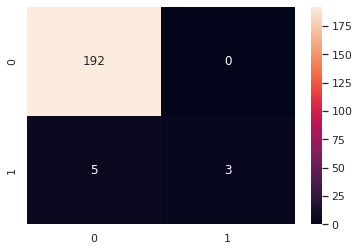

In [118]:
cf_mul_nv_ =  confusion_matrix(y_true=y_test, y_pred=y_multiionnomail_nb)
sns.heatmap(cf_mul_nv_, annot=True,fmt='g')

<AxesSubplot:>

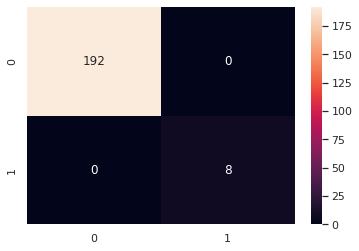

In [119]:
cf_mul_nv_ =  confusion_matrix(y_true=y_test, y_pred=anp)
sns.heatmap(cf_mul_nv_, annot=True,fmt='g')